# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

   relationship_length  relationship_length_months
9           4 month(s)                        4.00
24           4 year(s)                       48.00
33           2 week(s)                        1.00
38           2 year(s)                       24.00
39            3 day(s)                        0.25
47          6 month(s)                        6.00
48           4 year(s)                       48.00
65           38 day(s)                        0.25
74          10 year(s)                      120.00
80           8 year(s)                       96.00


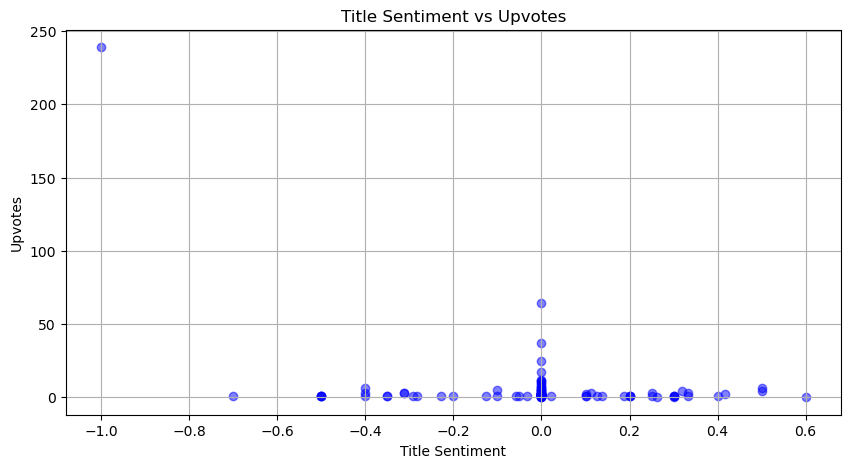

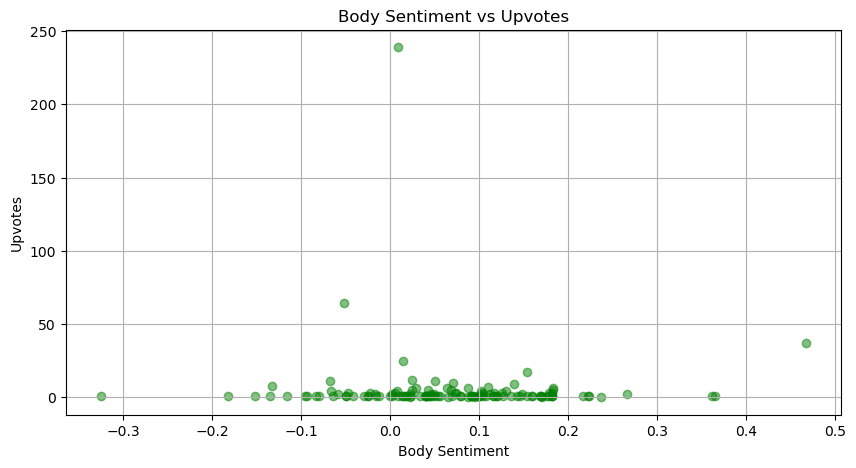

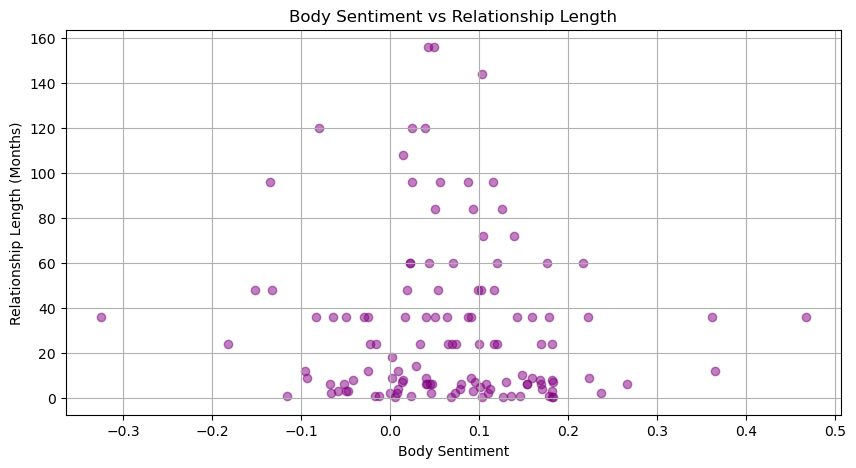

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

def convert_to_months(text):
    if pd.isna(text):
        return None
    text = text.lower().strip()
    if 'year' in text:
        match = re.search(r'(\d+(\.\d+)?)', text)
        if match:
            return float(match.group(1)) * 12
    elif 'month' in text:
        match = re.search(r'(\d+)', text)
        if match:
            return int(match.group(1))
    elif 'week' in text:
        return 1
    elif 'day' in text:
        return 0.25
    return None

df = pd.read_csv('reddit_breakups.csv')
df = df.dropna(subset=['title', 'body'])
df['upvotes'] = pd.to_numeric(df['upvotes'], errors='coerce')
df['relationship_length_months'] = df['relationship_length'].apply(convert_to_months)
df = df[(df['upvotes'].notna()) & (df['relationship_length_months'].notna())]

df['title_sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['body_sentiment'] = df['body'].apply(lambda x: TextBlob(x).sentiment.polarity)

plt.figure(figsize=(10, 5))
plt.scatter(df['title_sentiment'], df['upvotes'], alpha=0.5, color='blue')
plt.title("Title Sentiment vs Upvotes")
plt.xlabel("Title Sentiment")
plt.ylabel("Upvotes")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['body_sentiment'], df['upvotes'], alpha=0.5, color='green')
plt.title("Body Sentiment vs Upvotes")
plt.xlabel("Body Sentiment")
plt.ylabel("Upvotes")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df['body_sentiment'], df['relationship_length_months'], alpha=0.5, color='purple')
plt.title("Body Sentiment vs Relationship Length")
plt.xlabel("Body Sentiment")
plt.ylabel("Relationship Length (Months)")
plt.grid(True)
plt.show()
